In [1]:
import tensorflow as tf
tf.config.gpu.set_per_process_memory_fraction(0.3)
tf.config.gpu.set_per_process_memory_growth(True)

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.01792371]
 [0.98329662]
 [0.98212946]
 [0.01754808]]


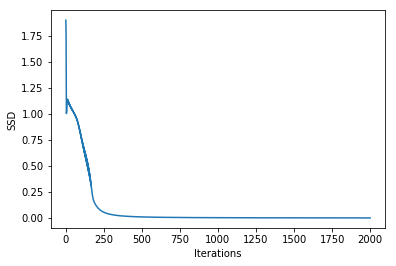

In [2]:
# Logic Operator

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sigmoid function
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input    = x
        self.neuron   = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1)                   # N neurons connected to output            
        self.y        = y
        self.output   = np.zeros(self.y.shape)                # instantiating the output

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)) 
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,
                            (2*(self.y - self.output)
                            * sigmoid_derivative(self.output)))
        
        d_weights1 = np.dot(self.input.T,
                            (np.dot(2*(self.y - self.output)
                            * sigmoid_derivative(self.output),
                            self.weights2.T) * sigmoid_derivative(self.layer1)))

        # weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2


iterations = 2000
n_unit = 10

if __name__ == "__main__": 
    
    Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]])
    
    Target = np.array([[0],[1],[1],[0]])
               
    model = NeuralNetwork(Input, Target, n_unit)
    
    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))            # Objective(loss) function
                      

    Itr = np.linspace(1,len(SSD),len(SSD))    
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')

    print("The target values are:", Target)
    print("The predicted values are:", model.output)


In [ ]:
# Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 50

model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer = SGD(),
              metrics=['binary_accuracy'])

model.fit(Input, Target, epochs = 5000, verbose=0)

print("The predicted class labels are:", model.predict(Input))

In [3]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize


img_w, img_h = 128, 128                                 # Setting the width and heights of the images
data_path = '/Lab1/Skin/'           # Path to data root. Inside this path,
                                                        #two subfolder are placed one for train data and one for test data.


train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2):
        if pat1 in im_name:
            Label = np.array([0])
        elif pat2 in im_name:
            Label = np.array([1])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label

x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)




/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Reading: 0/1000  of train images
Reading: 200/1000  of train images
Reading: 400/1000  of train images
Reading: 600/1000  of train images
Reading: 800/1000  of train images
Reading: 0/200 of test images
Reading: 100/200 of test images


In [ ]:
# MLP Example; Complete the code
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n_epochs = 60
Batch_Size = 16
Base = 64
LR = 0.0001




def model(img_ch, img_w, img_h):
    model = Sequential()
    model.add(Flatten(input_shape=(img_w, img_h, img_ch)))
    model.add(Dense(Base, activation='relu'))
    model.add(Dense(Base//2, activation='relu'))
    model.add(Dense(Base//4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    return model
    

model_MLP=model(1,100,100)
model_MLP.compile(loss='binary_crossentropy',optimizer = SGD(LR),metrics=['binary_accuracy'])

In [ ]:


History = model_MLP.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size = Batch_Size, epochs= n_epochs, verbose=1)
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 


In [ ]:
# LeNet Model for skin images
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

Base = 8
LR = 0.001

def model(img_ch, img_width, img_height):
    model = Sequential()
    model.add(Conv2D(Base, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same',
                     input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(Base*2, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(Base*2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    return model

model_LeNet=model(1,100,100)


In [ ]:

n_epochs = 80
Batch_Size = 8

model_LeNet.compile(loss='binary_crossentropy',optimizer = Adam(LR),metrics=['binary_accuracy'])


History = model_LeNet.fit(x_train, y_train, batch_size = Batch_Size, epochs= n_epochs, verbose=1, validation_data=(x_test,y_test))
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 


In [4]:
# AlexNet Model for skin images
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout

Base = 4
LR = 0.01
def model(img_ch, img_width, img_height):
    
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.summary()   
    return model
model_AlexNet=model(1,128,128)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 4)       40        
_________________________________________________________________
activation (Activation)      (None, 128, 128, 4)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 8)         296       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        1

Train on 1000 samples, validate on 200 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6939 - binary_accuracy: 0.4910 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6932 - binary_accuracy: 0.5020 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6959 - binary_accuracy: 0.4960 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6934 - binary_accuracy: 0.4990 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6935 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6937 - binary_accuracy: 0.5140 - val_loss: 0.6932 - val_binary_accu

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6936 - binary_accuracy: 0.4700 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 52/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6930 - binary_accuracy: 0.5170 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 53/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6932 - binary_accuracy: 0.4900 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 54/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6934 - binary_accuracy: 0.4880 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 55/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6933 - binary_accuracy: 0.4880 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 56/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6929 - binary_accuracy: 0.5110 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 57/100
1000/1000 [=================

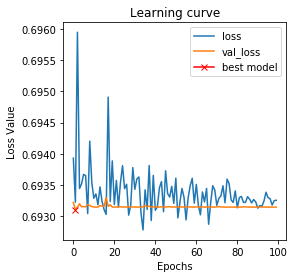

In [6]:
n_epochs = 100
Batch_Size = 8

model_AlexNet.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['binary_accuracy'])


History = model_AlexNet.fit(x_train, y_train, batch_size = Batch_Size, epochs= n_epochs, verbose=1, validation_data=(x_test,y_test))
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 


In [ ]:
#VGG

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
input_shape = (128, 128, 1)

#Instantiate an empty model
Base = 8

def model(img_ch, img_width, img_height):
    
    model = Sequential([
    Conv2D(Base, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
    Conv2D(Base, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*2, (3, 3), activation='relu', padding='same'),
    Conv2D(Base*2, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*4, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*4, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*4, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='softmax')
    ])
    model.summary()   
    return model
model_VGG=model(1,128,128)

In [ ]:
# Compile the model
n_epochs = 50
Batch_Size = 8
model_VGG.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
History = model_VGG.fit(x_train, y_train, batch_size = Batch_Size, epochs= n_epochs, verbose=1, validation_data=(x_test,y_test))
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

In [ ]:
#Loading bone data

import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize


img_w, img_h = 128, 128                                 # Setting the width and heights of the images
data_path =  '/Lab1/Bone/'
           # Path to data root. Inside this path,
                                                        #two subfolder are placed one for train data and one for test data.


train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2):
        if pat1 in im_name:
            Label = np.array([0])
        elif pat2 in im_name:
            Label = np.array([1])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'AFF', 'NFF')]) 
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'AFF', 'NFF')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label

x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)

In [ ]:
# LeNet Model for bone images
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

Base = 8
LR = 0.0001

def model(img_ch, img_width, img_height):
    model = Sequential()
    model.add(Conv2D(Base, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same',
                     input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(Base*2, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(Base*2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    return model

model_LeNet=model(1,128,128)

In [ ]:
n_epochs = 50
Batch_Size = 8

model_LeNet.compile(loss='binary_crossentropy',optimizer = Adam(LR),metrics=['binary_accuracy'])


History = model_LeNet.fit(x_train, y_train, batch_size = Batch_Size, epochs= n_epochs, verbose=1, validation_data=(x_test,y_test))
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

In [ ]:
# AlexNet Model for bone images
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout

Base = 8
LR = 0.0001
def model(img_ch, img_width, img_height):
    
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.summary()   
    return model
model_AlexNet=model(1,128,128)

In [ ]:
n_epochs = 50
Batch_Size = 8

model_AlexNet.compile(loss='binary_crossentropy',optimizer = Adam(LR),metrics=['binary_accuracy'])


History = model_AlexNet.fit(x_train, y_train, batch_size = Batch_Size, epochs= n_epochs, verbose=1, validation_data=(x_test,y_test))
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

In [ ]:
#VGG for bone images
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
input_shape = (128, 128, 1)

#Instantiate an empty model
Base = 8

def model(img_ch, img_width, img_height):
    
    model = Sequential([
    Conv2D(Base, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
    Conv2D(Base, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*2, (3, 3), activation='relu', padding='same'),
    Conv2D(Base*2, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*4, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*4, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*4, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='softmax')
    ])
    model.summary()   
    return model
model_VGG=model(1,128,128)

In [ ]:
# Compile the model
n_epochs = 50
Batch_Size = 8
model_VGG.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
History = model_VGG.fit(x_train, y_train, batch_size = Batch_Size, epochs= n_epochs, verbose=1, validation_data=(x_test,y_test))
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();